In [1]:
#Importing all the required libraries and loading in the IBMQ Account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit_textbook.tools import random_state
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram
#Loading up the IBMQ account. This is a one time process for a computer
#IBMQ.save_account('Your IBM Key here')
IBMQ.load_account()
print("Account loaded and libraries imported")


Account loaded and libraries imported


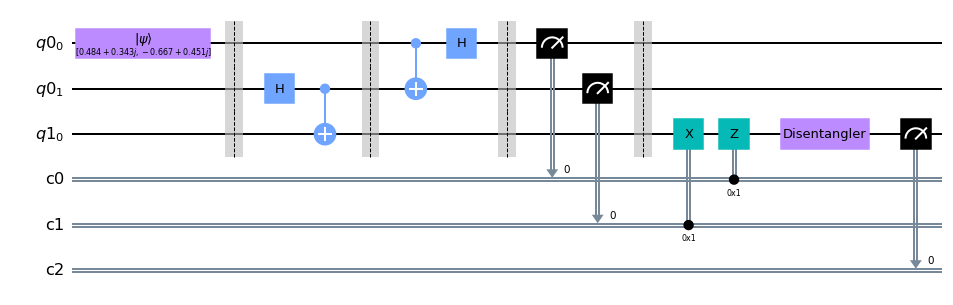

In [2]:
Alice = QuantumRegister(2)
Bob = QuantumRegister(1)
AliceC = ClassicalRegister(1)
BobC = ClassicalRegister(1)
Classical = ClassicalRegister(1)
#Constructing the circuit
qc = QuantumCircuit(Alice,Bob,AliceC,BobC,Classical)
psi = Initialize(random_state(1))
qc.append(psi,[0])
qc.barrier()
qc.h(Alice[1])
qc.cx(Alice[1], Bob)
qc.barrier()
qc.cx(Alice[0], Alice[1])
qc.h(Alice[0])
qc.barrier()
qc.measure(Alice[0], AliceC)
qc.measure(Alice[1], BobC)
qc.barrier()
qc.x(Bob).c_if(BobC, 1)
qc.z(Bob).c_if(AliceC, 1) 
reverse = psi.gates_to_uncompute()
qc.append(reverse, [2])
qc.measure(Bob, Classical)
qc.draw(output='mpl')

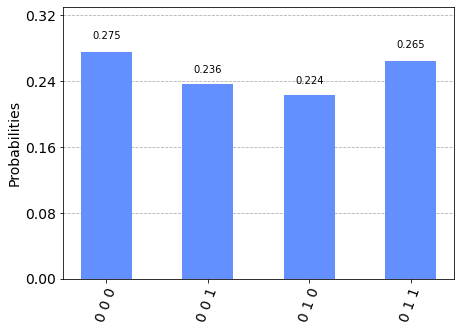

In [3]:
#Running it on the local backend
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend).result()
#results.get_counts()
plot_histogram(results.get_counts())

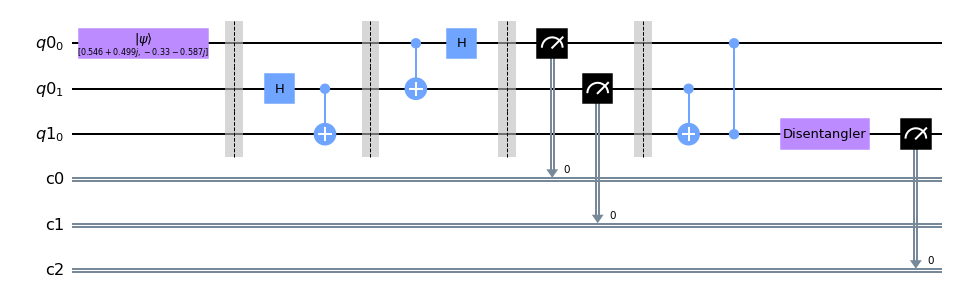

In [2]:
#Running on a real quantum computer
Alice = QuantumRegister(2)
Bob = QuantumRegister(1)
AliceC = ClassicalRegister(1)
BobC = ClassicalRegister(1)
Classical = ClassicalRegister(1)
#Constructing the circuit
qc = QuantumCircuit(Alice,Bob,AliceC,BobC,Classical)
psi = Initialize(random_state(1))
qc.append(psi,[0])
qc.barrier()
qc.h(Alice[1])
qc.cx(Alice[1], Bob)
qc.barrier()
qc.cx(Alice[0], Alice[1])
qc.h(Alice[0])
qc.barrier()
qc.measure(Alice[0], AliceC)
qc.measure(Alice[1], BobC)
qc.barrier()
#Changing the code a little bit to make it supported on real hardware
qc.cx(Alice[1], Bob)
qc.cz(Alice[0], Bob)
reverse = psi.gates_to_uncompute()
qc.append(reverse, [2])
qc.measure(Bob, Classical)
qc.draw(output='mpl')

We will use the backend: ibmq_manila


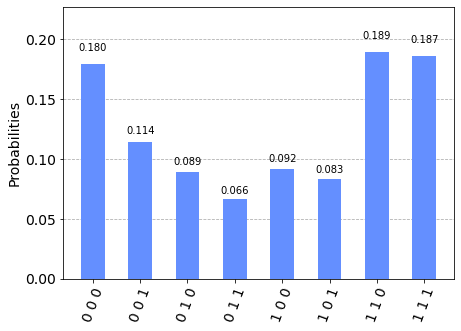

In [3]:
#Finding out which real life IBMQ backend provider can be used
#This will fail if the least busy backend does not support atleast 3 qubits as our cicuit is made up of 3 qubis
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(simulator=False))
#backend = provider.backends(simulator=False)[0]
print('We will use the backend:',backend)
#Running it on a real backend
job_exp = execute(qc, backend=backend, shots=1024)
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
#print(exp_measurement_result)
plot_histogram(exp_measurement_result)